# Shangwe Nyota Project 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Concrete_Data.csv')
pd.set_option('display.max_columns', 11)

## Exploratory Data Analysis (Part A)

In [3]:
df.columns = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water","Superplasticizer", "CoarseAggregate","FineAggregate", "Age", "Strength"]
X = df.drop("Strength", axis=1)
y = df["Strength"]
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Plotting Target Variable Distribution

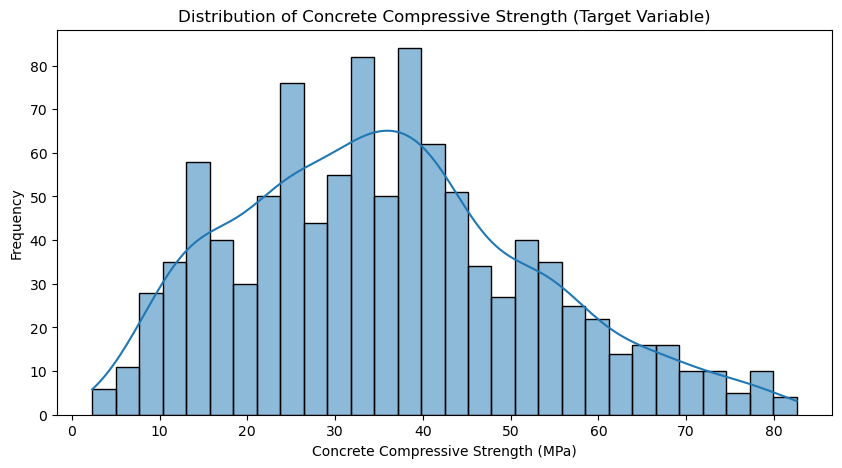

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Concrete Compressive Strength (Target Variable)")
plt.xlabel("Concrete Compressive Strength (MPa)")
plt.ylabel("Frequency")
plt.show()

This shows the target variable (concrete stregnth) has a slight right skew with verfy few outliers ~ 80 MPa.

#### Plotting Feature Distribution

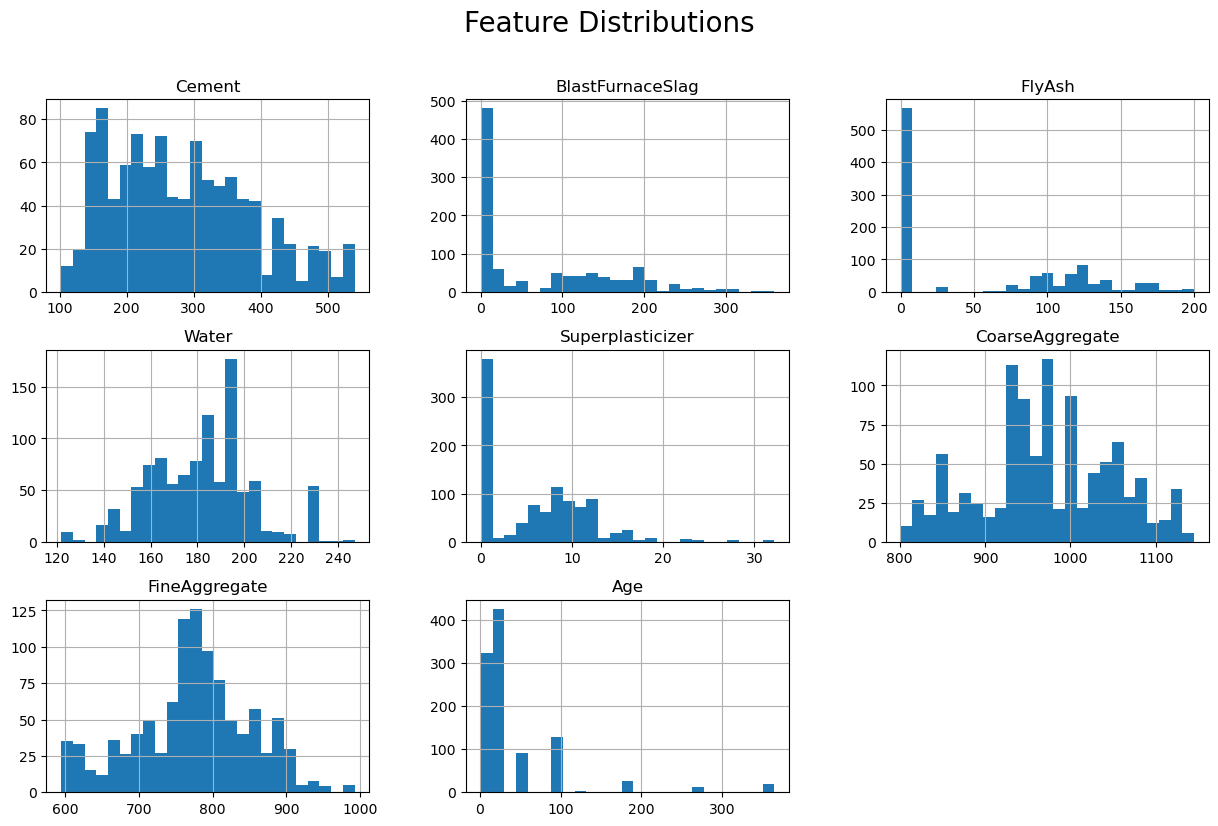

In [7]:
X.hist(figsize=(15,9), bins=25)
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

Histograms show that slag,fly ash, and superplatizer have many zeroes indicating that many mixtures do not use them. Furthermore Age is quite right skewed; however, the aggregates are fairly symmetric.  

#### Plotting Correlation Matrix¶


Text(0.5, 1.0, 'Correlation Matrix')

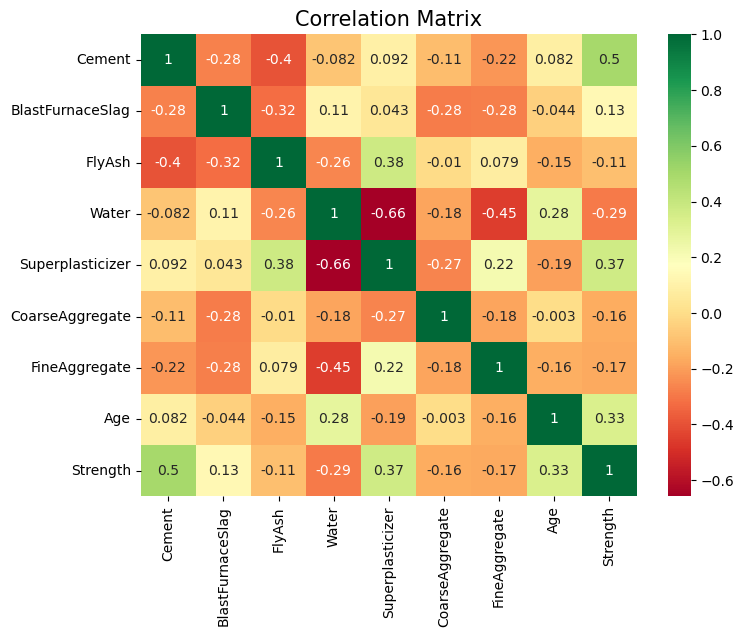

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.title("Correlation Matrix", fontsize=15)

In [9]:
corr_strength = (
    df.corr()["Strength"]
      .sort_values(ascending=False)
      .to_frame(name="Correlation with Strength")).rename(columns={"index": "Feature"})

corr_strength

,Correlation with Strength
Strength,1.000000
Cement,0.497832
Superplasticizer,0.366079
Age,0.328873
BlastFurnaceSlag,0.134829
FlyAsh,-0.105755
CoarseAggregate,-0.164935
FineAggregate,-0.167241
Water,-0.289633


This shows that cement is the strongest positive predictor as well as Superplasticizer and Age being strong predictors of cement strength as well. The strongest negative predictor of cement strength is water.

#### Plotting Individual Features vs Target (Strength)¶


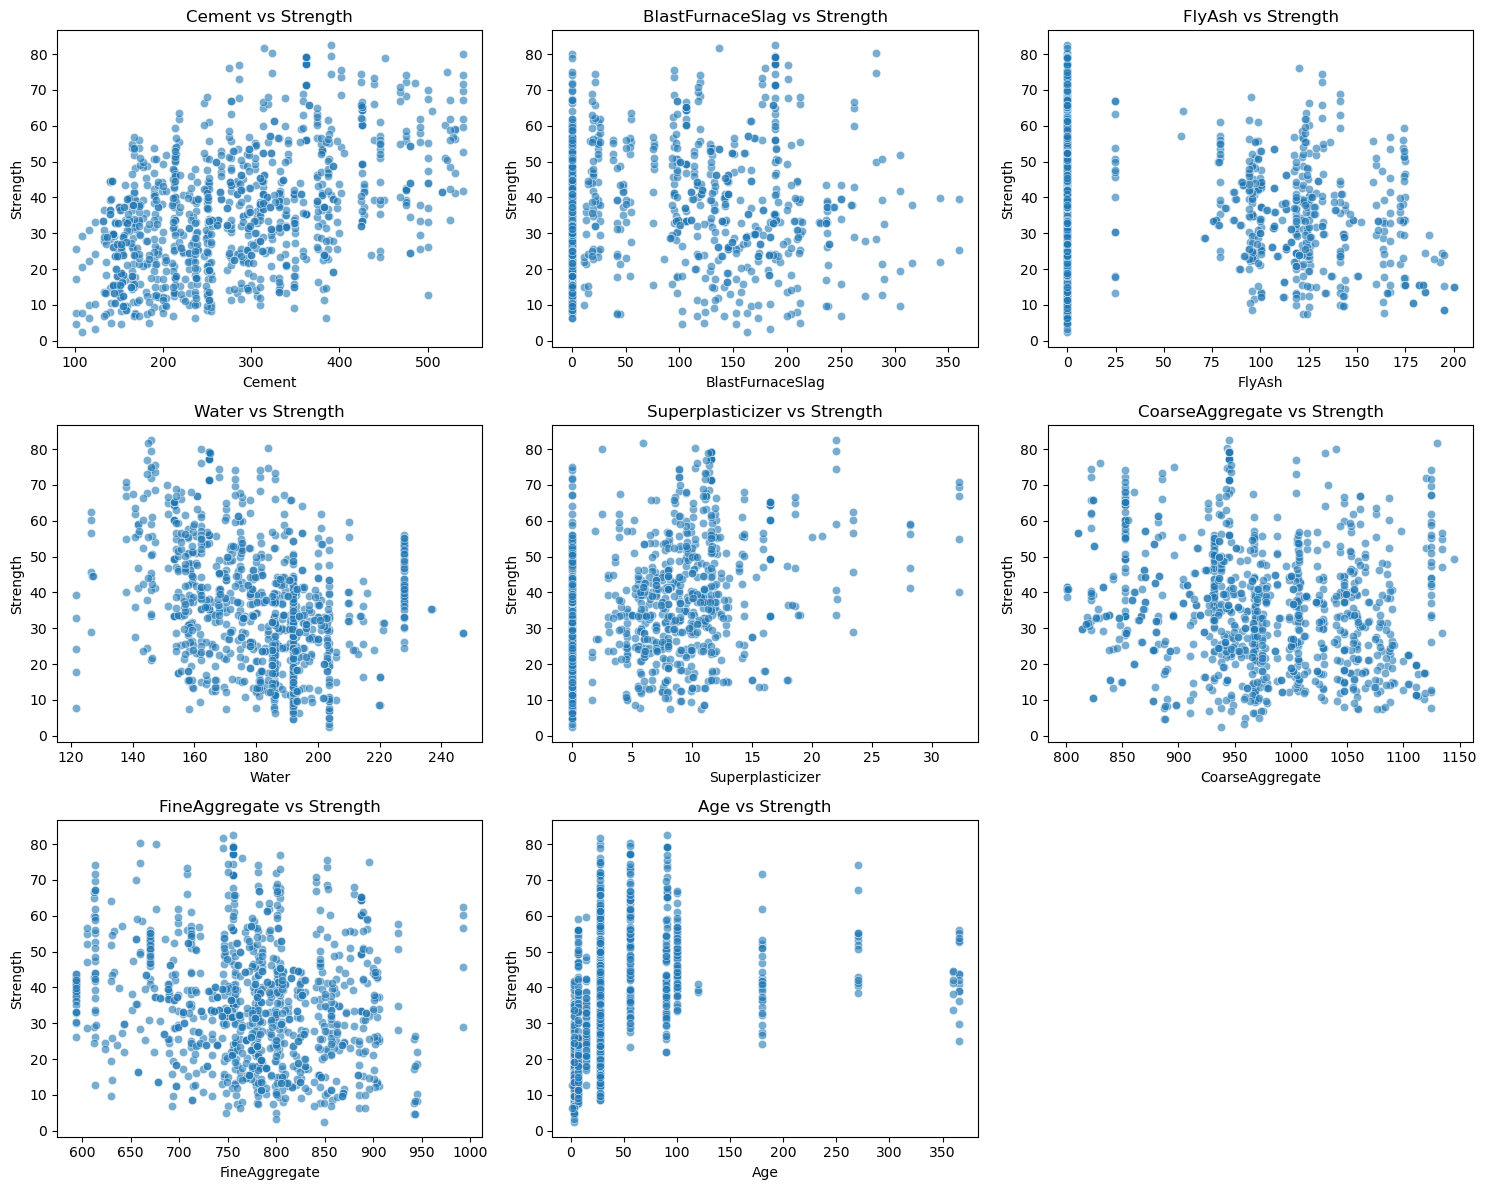

In [10]:
num_cols = X.columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(x=df[col], y=y, ax=axes[i], alpha=0.6)
    axes[i].set_title(f"{col} vs Strength")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Strength")

fig.delaxes(axes[-1]) 
plt.tight_layout()
plt.show()

#### Checking MultiCollinearity

In [11]:
X.corr()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246
FlyAsh,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016
FineAggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000


#### Checking For Outliers

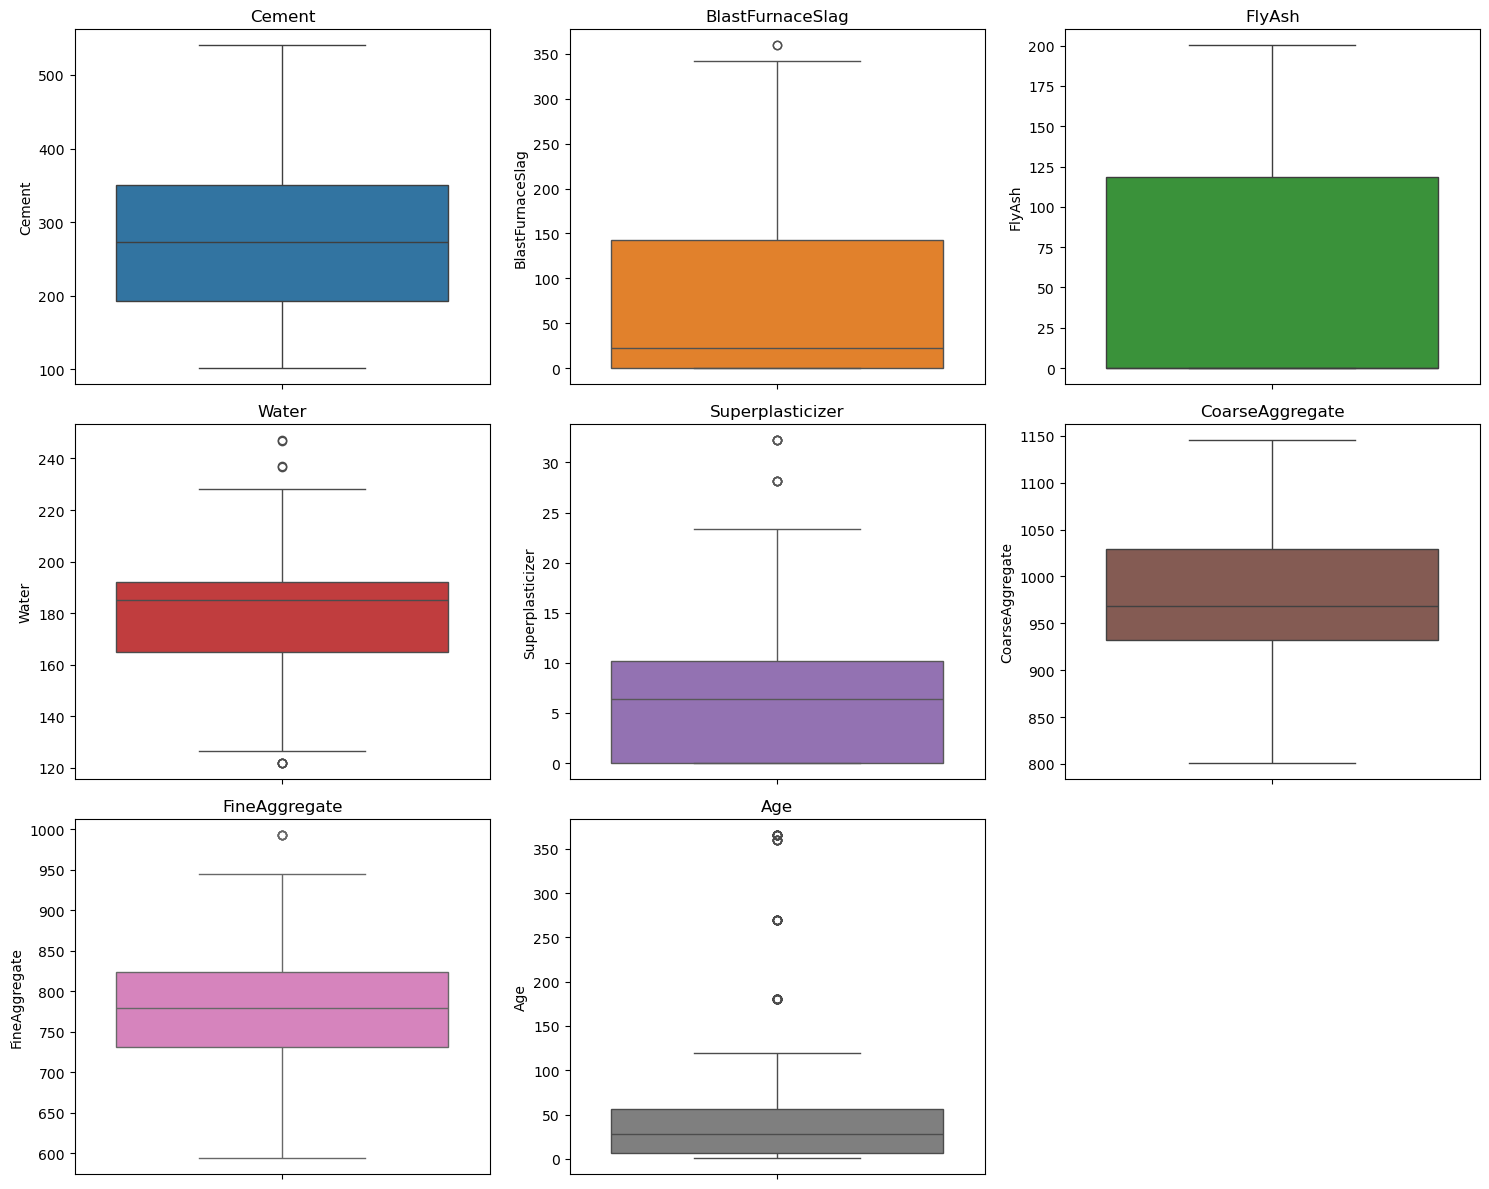

In [12]:
cols = X.columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
palette = sns.color_palette("tab10", len(cols))

for i, col in enumerate(cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_title(col)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

#### Ratio Observation

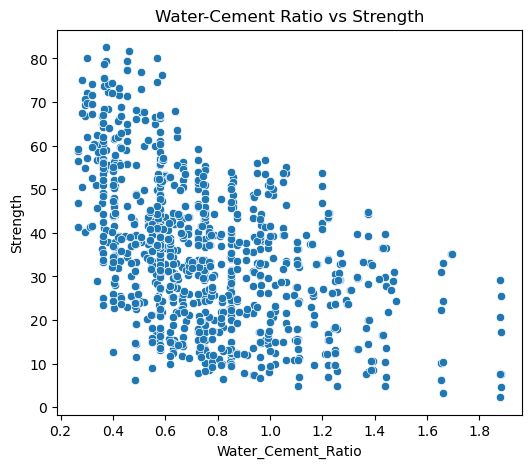

,Water_Cement_Ratio,Strength
Water_Cement_Ratio,1.000000,-0.500692
Strength,-0.500692,1.000000


In [13]:
df["Water_Cement_Ratio"] = df["Water"] / df["Cement"]
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["Water_Cement_Ratio"], y=y)
plt.title("Water-Cement Ratio vs Strength")
plt.show()

df[["Water_Cement_Ratio", "Strength"]].corr()

This shows that the ratio of water and cement are negatively correlated with cement strength. This is even a stronger correlation than the strength feature. 

## Gradient Descent Optimization (Part B)

In [14]:
X_test = X.iloc[500:630]
y_test = y.iloc[500:630]

X_train = pd.concat([X.iloc[:500], X.iloc[630:]])
y_train = pd.concat([y.iloc[:500], y.iloc[630:]])
print(f"Training Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Shape:  {X_test.shape}, {y_test.shape}")

Training Shape: (900, 8), (900,)
Test Shape:  (130, 8), (130,)


In [15]:
def standardize_features(X_train_df, X_test_df):
    column_means = X_train_df.mean(axis=0)
    column_stds  = X_train_df.std(axis=0, ddof=0)
    X_tr_scaled = (X_train_df - column_means) / column_stds
    X_te_scaled = (X_test_df - column_means) / column_stds
    return X_tr_scaled, X_te_scaled

def compute_mse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)

def r2(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    sum_of_squared_residuals = np.sum((y_true - y_pred) ** 2)
    total_sum_squared_error = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - sum_of_squared_residuals / total_sum_squared_error

In [16]:
def univariate_gradient_descent(x, y, alpha=0.01, iters=5000, intercept_init=0.0):
    """
    Performs gradient descent via univariate model (y_predicted = slope * x + intercept)
    using MSE as the loss function.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)
    slope = 0.0
    intercept = intercept_init
    mse_per_iteration = []
    for _ in range(iters):
        y_predicted = slope * x + intercept
        residuals = y - y_predicted
        slope_gradient     = (-2 / n) * np.sum(x * residuals)
        intercept_gradient = (-2 / n) * np.sum(residuals)
        slope     -= alpha * slope_gradient
        intercept -= alpha * intercept_gradient
        mse_per_iteration.append(np.mean(residuals ** 2))
    return slope, intercept, mse_per_iteration

In [17]:
#1.1 Univariate Standardized Predictors
X_train_std, X_test_std = standardize_features(X_train, X_test)

standardized_results = []

for feature in X.columns:
    x_train_col = X_train_std[feature].values
    x_test_col  = X_test_std[feature].values

    slope, intercept, mse_per_iteration = univariate_gradient_descent(
        x_train_col, y_train.values, alpha=0.01, iters=8000
    )

    train_predictions = slope * x_train_col + intercept
    test_predictions  = slope * x_test_col  + intercept

    result = {
        "feature":   feature,
        "slope (m)":     slope,
        "intercept (b)": intercept,
        "train_mse": compute_mse(y_train, train_predictions),
        "train_r2":  r2(y_train, train_predictions),
        "test_mse":  compute_mse(y_test, test_predictions),
        "test_r2":   r2(y_test, test_predictions),
    }
    standardized_results.append(result)

univariate_standardized_df = pd.DataFrame(standardized_results).sort_values("train_r2", ascending=False)
univariate_standardized_df

,feature,slope (m),intercept (b),train_mse,train_r2,test_mse,test_r2
0,Cement,8.558408,36.926911,203.772607,0.264409,265.939792,-0.188500
7,Age,5.834770,36.926911,242.974418,0.122896,299.241612,-0.337327
4,Superplasticizer,5.309944,36.926911,248.823454,0.101782,197.737012,0.116302
3,Water,-4.609761,36.926911,255.769062,0.076709,261.295869,-0.167746
2,FlyAsh,-3.429882,36.926911,265.254867,0.042467,382.497231,-0.709401
1,BlastFurnaceSlag,2.655211,36.926911,269.968811,0.025450,310.197877,-0.386291
6,FineAggregate,-2.503316,36.926911,270.752363,0.022622,282.823276,-0.263953
5,CoarseAggregate,-2.122967,36.926911,272.511966,0.016270,275.580382,-0.231584


In [18]:
#1.2 Univariate Raw data
def find_best_univariate_on_raw_data(x_train_col, y_train_vals, x_test_col, y_test_vals):
    learning_rates   = [1e-9, 5e-9, 1e-8, 5e-8, 1e-7]
    iteration_counts = [4000, 8000, 25000, 50000]
    intercept_starting_point = float(np.mean(y_train_vals))
    best_model = None

    for learning_rate in learning_rates:
        for number_of_iterations in iteration_counts:
            slope, intercept, _ = univariate_gradient_descent(
                x_train_col, y_train_vals,
                alpha=learning_rate, iters=number_of_iterations,
                intercept_init=intercept_starting_point
            )
            train_predictions = slope * x_train_col + intercept
            test_predictions  = slope * x_test_col  + intercept
            current_candidate_model = {
                "learning_rate": learning_rate,
                "iterations":    number_of_iterations,
                "slope (m)":         slope,
                "intercept (b)":     intercept,
                "train_mse":     compute_mse(y_train_vals, train_predictions),
                "train_r2":      r2(y_train_vals, train_predictions),
                "test_mse":      compute_mse(y_test_vals, test_predictions),
                "test_r2":       r2(y_test_vals, test_predictions),
            }
            if (best_model is None) or (current_candidate_model["train_r2"] > best_model["train_r2"]):
                best_model = current_candidate_model
    return best_model

raw_results = []
for feature in X.columns:
    x_train_col = X_train[feature].values
    x_test_col  = X_test[feature].values
    best_model = find_best_univariate_on_raw_data(x_train_col, y_train.values, x_test_col, y_test.values)
    best_model["feature"] = feature
    raw_results.append(best_model)

univariate_raw_df = pd.DataFrame(raw_results).sort_values("train_r2", ascending=False)
univariate_raw_df

,learning_rate,iterations,slope (m),intercept (b),train_mse,train_r2,test_mse,test_r2,feature
7,1.000000e-07,50000,0.061067,36.899455,255.104709,0.079107,343.863774,-0.536746,Age
4,1.000000e-07,50000,0.216003,36.918519,267.145377,0.035642,295.025534,-0.318485,Superplasticizer
0,1.000000e-07,50000,0.010342,36.898473,267.561130,0.034141,349.673213,-0.562709,Cement
2,1.000000e-07,50000,-0.029827,36.943675,270.419725,0.023822,314.263833,-0.404462,FlyAsh
1,1.000000e-07,50000,0.017435,36.913839,273.111661,0.014105,327.579256,-0.463970,BlastFurnaceSlag
3,1.000000e-07,50000,-0.003126,36.932488,276.695012,0.001169,290.751799,-0.299386,Water
6,1.000000e-07,50000,-0.000343,36.929534,276.947958,0.000256,296.170073,-0.323600,FineAggregate
5,1.000000e-07,50000,-0.000174,36.928590,276.990004,0.000105,297.845486,-0.331088,CoarseAggregate


In [19]:
def multivariate_gradient_descent(X, y, alpha=0.01, iters=1000, initial_slope=0.0, initial_intercept=0.0):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)
    n, num_features = X.shape
    slopes = np.zeros(num_features) + initial_slope
    intercept = float(initial_intercept)

    mse_per_iteration = []
    best_mse = float('inf')
    best_slopes = slopes.copy()
    best_intercept = intercept

    for _ in range(iters):
        y_predicted =X@ slopes + intercept
        residuals =y-y_predicted

        slope_gradients    = (-2.0 / n)*(X.T @ residuals)
        intercept_gradient = (-2.0 / n)* np.sum(residuals)

        slopes -= alpha * slope_gradients
        intercept-= alpha * intercept_gradient

        current_mse = np.mean(residuals ** 2)
        mse_per_iteration.append(current_mse)

        if current_mse < best_mse:
            best_mse       = current_mse
            best_slopes    = slopes.copy()
            best_intercept = intercept

    return best_slopes, best_intercept, mse_per_iteration

In [20]:
#2.1 Code Test 1
X1 = np.array([[3, 4, 5]])
y1 = np.array([4])
m, b, mse_per_iteration = multivariate_gradient_descent(np.array([[3, 4, 5]]), np.array([4]), alpha=0.1, iters=1, initial_slope=1.0, initial_intercept=1.0)
print("m1:", m[0])
print("m2:", m[1])
print("m3:", m[2])
print("b:", b)

m1: -4.4
m2: -6.2
m3: -8.0
b: -0.8


In [21]:
#2.2 Code Test 2
X_code_test_2 = np.array([
    [3, 4, 4],
    [4, 2, 1],
    [10, 2, 5],
    [3, 4, 5],
    [11, 1, 1]
])
y_code_test_2 = np.array([3, 2, 8, 4, 5])

m, b, mse_per_iteration = multivariate_gradient_descent(X_code_test_2, y_code_test_2, alpha=0.1, iters=1, initial_slope=1.0, initial_intercept=1.0)
print("m1:", m[0])
print("m2:", m[1])
print("m3:", m[2])
print("b:", b)

m1: -10.080000000000002
m2: -3.5200000000000005
m3: -4.840000000000001
b: -0.72


In [30]:
#2.3 Multivariate Model w/ Standardized Data
X_train_std, X_test_std = standardize_features(X_train, X_test)

slopes_std, intercept_std, mse_per_iteration_std = multivariate_gradient_descent(
    X_train_std, y_train.values,
    alpha=0.1, iters=2000,
    initial_slope=0.0, initial_intercept=0.0
)

train_predictions_std = X_train_std.values @ slopes_std + intercept_std
test_predictions_std  = X_test_std.values  @ slopes_std + intercept_std

train_mse_std = compute_mse(y_train, train_predictions_std)
train_r2_std  = r2(y_train, train_predictions_std)
test_mse_std  = compute_mse(y_test, test_predictions_std)
test_r2_std   = r2(y_test, test_predictions_std)

multivariate_std_df = pd.DataFrame({
    "feature":     X_train.columns,
    "slope":       slopes_std,
    "intercept":   intercept_std,
    "train_mse":   train_mse_std,
    "train_r2":    train_r2_std,
    "test_mse":    test_mse_std,
    "test_r2":     test_r2_std,
})

multivariate_std_df

,feature,slope,intercept,train_mse,train_r2,test_mse,test_r2
0,Cement,14.032633,36.926911,104.136462,0.624082,141.235266,0.368812
1,BlastFurnaceSlag,10.481747,36.926911,104.136462,0.624082,141.235266,0.368812
2,FlyAsh,6.816141,36.926911,104.136462,0.624082,141.235266,0.368812
3,Water,-2.977169,36.926911,104.136462,0.624082,141.235266,0.368812
4,Superplasticizer,0.710981,36.926911,104.136462,0.624082,141.235266,0.368812
5,CoarseAggregate,2.217840,36.926911,104.136462,0.624082,141.235266,0.368812
6,FineAggregate,2.772497,36.926911,104.136462,0.624082,141.235266,0.368812
7,Age,7.280874,36.926911,104.136462,0.624082,141.235266,0.368812


In [31]:
#Multivariable Model with Raw Data
def find_best_multivariate_on_raw_data(X_tr, y_tr, X_te, y_te, learning_rates, iteration_counts):
    best_model = None
    for learning_rate in learning_rates:
        for number_of_iterations in iteration_counts:
            slopes, intercept, _ = multivariate_gradient_descent(
                X_tr, y_tr,
                alpha=learning_rate,
                iters=number_of_iterations,
                initial_slope=0.0, initial_intercept=float(np.mean(y_tr))
            )
            train_predictions = X_tr.values @ slopes + intercept
            test_predictions  = X_te.values @ slopes + intercept
            current_model = {
                "learning_rate": learning_rate,
                "iterations":    number_of_iterations,
                "slopes":        slopes,
                "intercept":     intercept,
                "training_mse":     compute_mse(y_tr, train_predictions),
                "training_r2":      r2(y_tr, train_predictions),
                "test_mse":      compute_mse(y_te, test_predictions),
                "test_r2":       r2(y_te, test_predictions),
            }
            if (best_model is None) or (current_model["training_r2"] > best_model["training_r2"]):
                best_model = current_model
    return best_model

learning_rates   = [1e-8, 3e-8, 5e-8, 8e-8, 1e-7]
iteration_counts = [50000, 75000, 100000, 150000, 200000]

best_raw_multivariate = find_best_multivariate_on_raw_data(
    X_train, y_train, X_test, y_test,
    learning_rates, iteration_counts
)

print("Best learning rate:", best_raw_multivariate["learning_rate"])
print("Best iterations:   ", best_raw_multivariate["iterations"])
print(f"Intercept (b):      {best_raw_multivariate['intercept']:.6f}")
print("\nSlopes (m) as array:")
print(best_raw_multivariate["slopes"])
print("\nSlopes (m) by feature:")
for feature, slope in zip(X_train.columns, best_raw_multivariate["slopes"]):
    print(f"  {feature:20s}: {slope:.8f}")
print(f"\nTrain MSE: {best_raw_multivariate['training_mse']:.6f}")
print(f"Train R2:  {best_raw_multivariate['training_r2']:.6f}")
print(f"Test MSE:  {best_raw_multivariate['test_mse']:.6f}")
print(f"Test R2:   {best_raw_multivariate['test_r2']:.6f}")

multivariate_raw_df = pd.DataFrame({
    "feature":      list(X_train.columns),
    "slope":        best_raw_multivariate["slopes"],
    "intercept":    best_raw_multivariate["intercept"],
    "train_mse":    best_raw_multivariate["training_mse"],
    "train_r2":     best_raw_multivariate["training_r2"],
    "test_mse":     best_raw_multivariate["test_mse"],
    "test_r2":      best_raw_multivariate["test_r2"],
})

multivariate_raw_df

Best learning rate: 1e-07
Best iterations:    200000
Intercept (b):      36.926187

Slopes (m) as array:
[ 0.10710717  0.093942    0.07102193 -0.25396349  0.02919377 -0.00121815
  0.00060104  0.11823167]

Slopes (m) by feature:
  Cement              : 0.10710717
  BlastFurnaceSlag    : 0.09394200
  FlyAsh              : 0.07102193
  Water               : -0.25396349
  Superplasticizer    : 0.02919377
  CoarseAggregate     : -0.00121815
  FineAggregate       : 0.00060104
  Age                 : 0.11823167

Train MSE: 105.243872
Train R2:  0.620084
Test MSE:  136.535508
Test R2:   0.389815


,feature,slope,intercept,train_mse,train_r2,test_mse,test_r2
0,Cement,0.107107,36.926187,105.243872,0.620084,136.535508,0.389815
1,BlastFurnaceSlag,0.093942,36.926187,105.243872,0.620084,136.535508,0.389815
2,FlyAsh,0.071022,36.926187,105.243872,0.620084,136.535508,0.389815
3,Water,-0.253963,36.926187,105.243872,0.620084,136.535508,0.389815
4,Superplasticizer,0.029194,36.926187,105.243872,0.620084,136.535508,0.389815
5,CoarseAggregate,-0.001218,36.926187,105.243872,0.620084,136.535508,0.389815
6,FineAggregate,0.000601,36.926187,105.243872,0.620084,136.535508,0.389815
7,Age,0.118232,36.926187,105.243872,0.620084,136.535508,0.389815


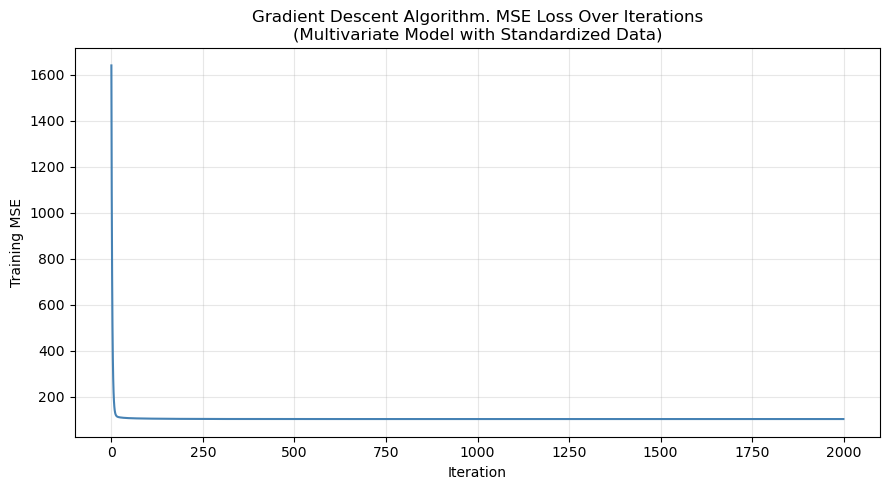

In [38]:
plt.figure(figsize=(9, 5))
plt.plot(mse_per_iteration_std, color='steelblue')
plt.title("Gradient Descent Algorithm. MSE Loss Over Iterations\n(Multivariate Model with Standardized Data)")
plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Gradient Descent Optimization (Part C)

In [25]:
def run_regression_analysis(X_tr, y_tr, X_te, y_te, label):
    X_tr_const = sm.add_constant(X_tr)
    X_te_const = sm.add_constant(X_te)

    ols_model = sm.OLS(y_tr, X_tr_const).fit()
    train_predictions = ols_model.predict(X_tr_const)
    test_predictions  = ols_model.predict(X_te_const)

    print(f"\n{'='*60}")
    print(f"SET: {label}")
    print(f"{'='*60}")
    print(f"Train MSE: {compute_mse(y_tr, train_predictions):.6f}")
    print(f"Train R2:  {r2(y_tr, train_predictions):.6f}")
    print(f"Test MSE:  {compute_mse(y_te, test_predictions):.6f}")
    print(f"Test R2:   {r2(y_te, test_predictions):.6f}")
    print(f"\nStatistical test: t-test")
    print(f"\nP-values by feature:")
    for feature, pval in zip(X_tr.columns, ols_model.pvalues[1:]):
        print(f"  {feature:20s}: {pval:.6f}")

    return ols_model



In [39]:
# Set 1: Standardized Data 
X_train_std, X_test_std = standardize_features(X_train, X_test)
model_std = run_regression_analysis(
    X_train_std, y_train, X_test_std, y_test, 
    "Standardized Predictors"
)

pvalues_standardized_data_df = pd.DataFrame({
    "feature":     X_train.columns,
    "coefficient": model_std.params[1:],
    "p_value":     model_std.pvalues[1:],
}).reset_index(drop=True)

print("\nStandardized Predictors Coefficients and P-Values:")
pvalues_standardized_data_df


SET: Standardized Predictors
Train MSE: 104.136462
Train R2:  0.624082
Test MSE:  141.235622
Test R2:   0.368810

Statistical test: t-test

P-values by feature:
  Cement              : 0.000000
  BlastFurnaceSlag    : 0.000000
  FlyAsh              : 0.000000
  Water               : 0.001843
  Superplasticizer    : 0.236255
  CoarseAggregate     : 0.005475
  FineAggregate       : 0.002942
  Age                 : 0.000000

Standardized Predictors - Coefficients and P-Values:


,feature,coefficient,p_value
0,Cement,14.032763,2.461200e-40
1,BlastFurnaceSlag,10.481871,6.354749e-26
2,FlyAsh,6.816255,3.318101e-13
3,Water,-2.977057,1.842734e-03
4,Superplasticizer,0.710994,2.362551e-01
5,CoarseAggregate,2.217937,5.474659e-03
6,FineAggregate,2.772618,2.941631e-03
7,Age,7.280877,8.526523e-74


In [40]:
# Set 2: Raw Data
model_raw = run_regression_analysis(
    X_train, y_train, X_test, y_test,
    "Raw Predictors"
)

pvalues_raw_data_df = pd.DataFrame({
    "feature":     X_train.columns,
    "coefficient": model_raw.params[1:],
    "p_value":     model_raw.pvalues[1:],
}).reset_index(drop=True)

print("\nCoefficients and P-Values of Raw Data Predictors:")
pvalues_raw_df = pd.DataFrame({
    "feature":     X_train.columns,
    "coefficient": model_raw.params[1:],
    "p_value":     model_raw.pvalues[1:],
}).reset_index(drop=True)

print("\nRaw Predictors - Coefficients and P-Values:")
pvalues_raw_df


SET: Raw Predictors
Train MSE: 104.136462
Train R2:  0.624082
Test MSE:  141.235622
Test R2:   0.368810

Statistical test: t-test

P-values by feature:
  Cement              : 0.000000
  BlastFurnaceSlag    : 0.000000
  FlyAsh              : 0.000000
  Water               : 0.001843
  Superplasticizer    : 0.236255
  CoarseAggregate     : 0.005475
  FineAggregate       : 0.002942
  Age                 : 0.000000

Coefficients and P-Values of Raw Data Predictors:

Raw Predictors - Coefficients and P-Values:


,feature,coefficient,p_value
0,Cement,0.132458,2.461200e-40
1,BlastFurnaceSlag,0.124742,6.354749e-26
2,FlyAsh,0.106131,3.318101e-13
3,Water,-0.133716,1.842734e-03
4,Superplasticizer,0.118918,2.362551e-01
5,CoarseAggregate,0.028609,5.474659e-03
6,FineAggregate,0.033870,2.941631e-03
7,Age,0.118804,8.526523e-74


In [41]:
# Set 3: Log transformed log(x+1)
X_train_log = np.log1p(X_train)
X_test_log  = np.log1p(X_test)
model_log = run_regression_analysis(
    X_train_log, y_train, X_test_log, y_test,
    "Log Transformed Predictors"
)


pvalues_log_data_df = pd.DataFrame({
    "feature":     X_train.columns,
    "coefficient": model_log.params[1:],
    "p_value":     model_log.pvalues[1:],
}).reset_index(drop=True)

print("\nLog Transformed Predictors Coefficients and P Values:")
pvalues_log_data_df



SET: Log Transformed Predictors
Train MSE: 55.829962
Train R2:  0.798462
Test MSE:  54.361412
Test R2:   0.757056

Statistical test: t-test

P-values by feature:
  Cement              : 0.000000
  BlastFurnaceSlag    : 0.000000
  FlyAsh              : 0.294868
  Water               : 0.000000
  Superplasticizer    : 0.000008
  CoarseAggregate     : 0.405417
  FineAggregate       : 0.088746
  Age                 : 0.000000

Log Transformed Predictors Coefficients and P Values:


,feature,coefficient,p_value
0,Cement,23.611862,1.100482e-85
1,BlastFurnaceSlag,2.302514,7.344729e-36
2,FlyAsh,0.195470,2.948676e-01
3,Water,-38.332155,1.680104e-20
4,Superplasticizer,1.877065,8.082551e-06
5,CoarseAggregate,4.188846,4.054171e-01
6,FineAggregate,-6.655351,8.874613e-02
7,Age,9.034468,1.737369e-192
